# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import metrics
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
import xgboost as xgb
from xgboost import plot_importance
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10,6]

In [3]:
os.chdir('C:\Python\Black Friday')

In [4]:
os.listdir()

['.ipynb_checkpoints', 'Black Friday.ipynb', 'BlackFriday.csv']

# 2. Data Observation

In [5]:
df = pd.read_csv('BlackFriday.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


> 可以看出存在2个float、5个int 5个范畴型数据。

> 范畴型变量可用下列方法处理：
- One Hot Encoder 
- OrdinalEncoder

In [7]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

> product_category 1 和 2 一经发现很多 null 了

In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [9]:
print ("Unique product ID : ", df.Product_ID.nunique())
print ("Size of the data set : ", df.shape[0])

Unique product ID :  3623
Size of the data set :  537577


# 3. EDA (Exploratory Data Analysis)

In [10]:
df['Stay_In_Current_City_Years'].value_counts()

1     189192
2      99459
3      93312
4+     82889
0      72725
Name: Stay_In_Current_City_Years, dtype: int64

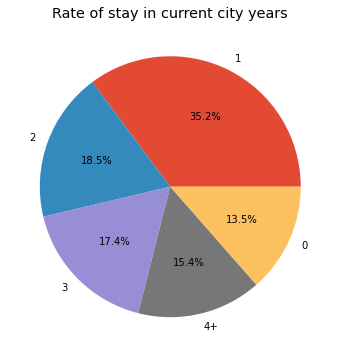

In [11]:
plt.pie(df['Stay_In_Current_City_Years'].value_counts(), autopct='%1.1f%%', labels=df['Stay_In_Current_City_Years'].value_counts().index)
plt.title('Rate of stay in current city years')
plt.show()

> 虽然1年居住者的比率最高，为35.2%，但除此之外大体上由均等的分布构成。

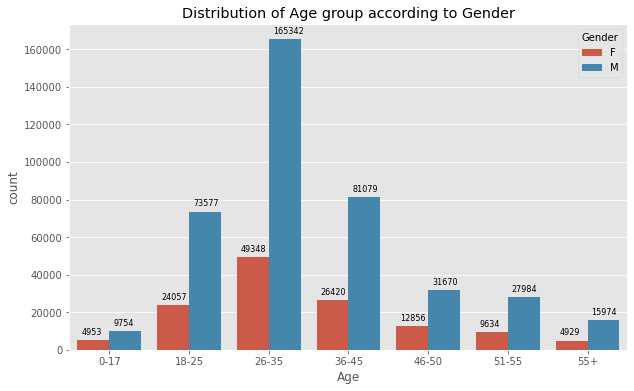

In [12]:
sns.countplot(data=df, x='Age', order=df['Age'].value_counts().sort_index().index, hue='Gender')

for i in range(0,7):
    a = df[df['Gender']=='F']['Age'].value_counts().sort_index().values[i]
    b = df[df['Gender']=='M']['Age'].value_counts().sort_index().values[i]
    plt.text(i-0.35, a+3000, f'{a}', size=8)
    plt.text(i+0.05, b+3000, f'{b}', size=8)

plt.title('Distribution of Age group according to Gender')
plt.show()

In [13]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

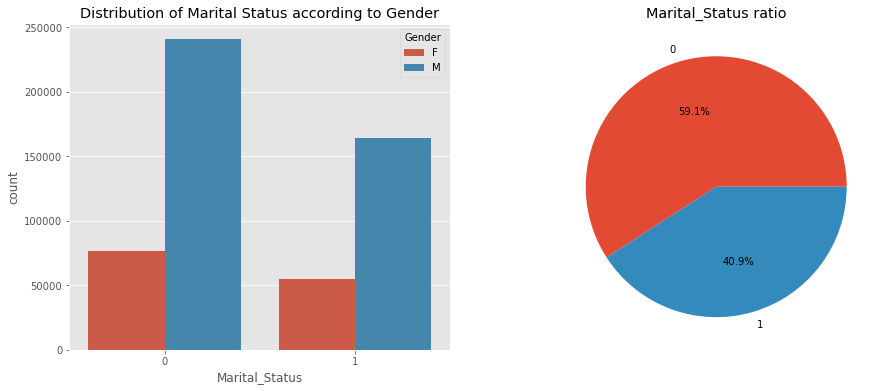

In [14]:
plt.figure(figsize=(15,6))

plt.subplot(121)
sns.countplot(data=df, x='Marital_Status', hue='Gender')
plt.title('Distribution of Marital Status according to Gender')

plt.subplot(122)
plt.pie(df['Marital_Status'].value_counts(), labels=df['Marital_Status'].value_counts().index, autopct='%1.1f%%')
plt.title('Marital_Status ratio')
plt.show()

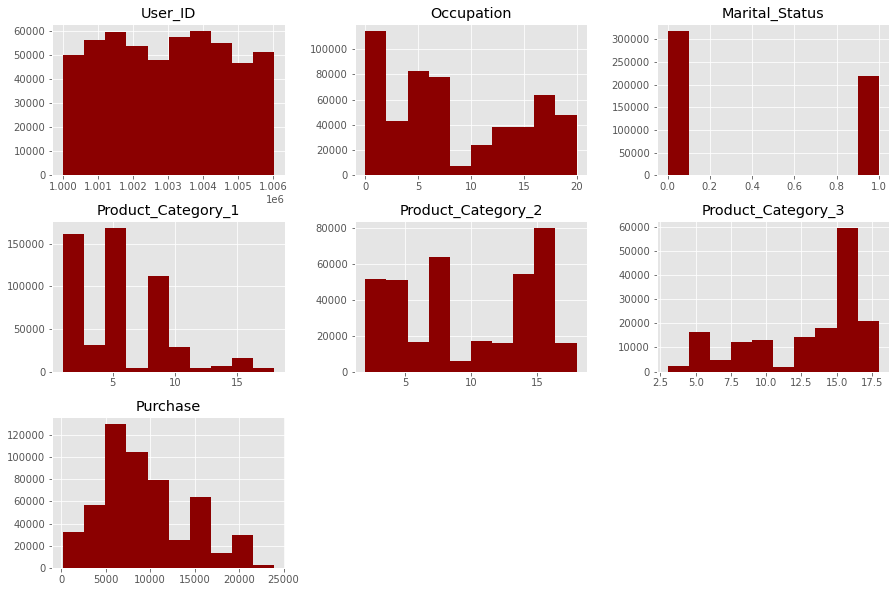

In [15]:
df.hist(bins=10 ,figsize=(15,10), color = 'darkred')
plt.show()

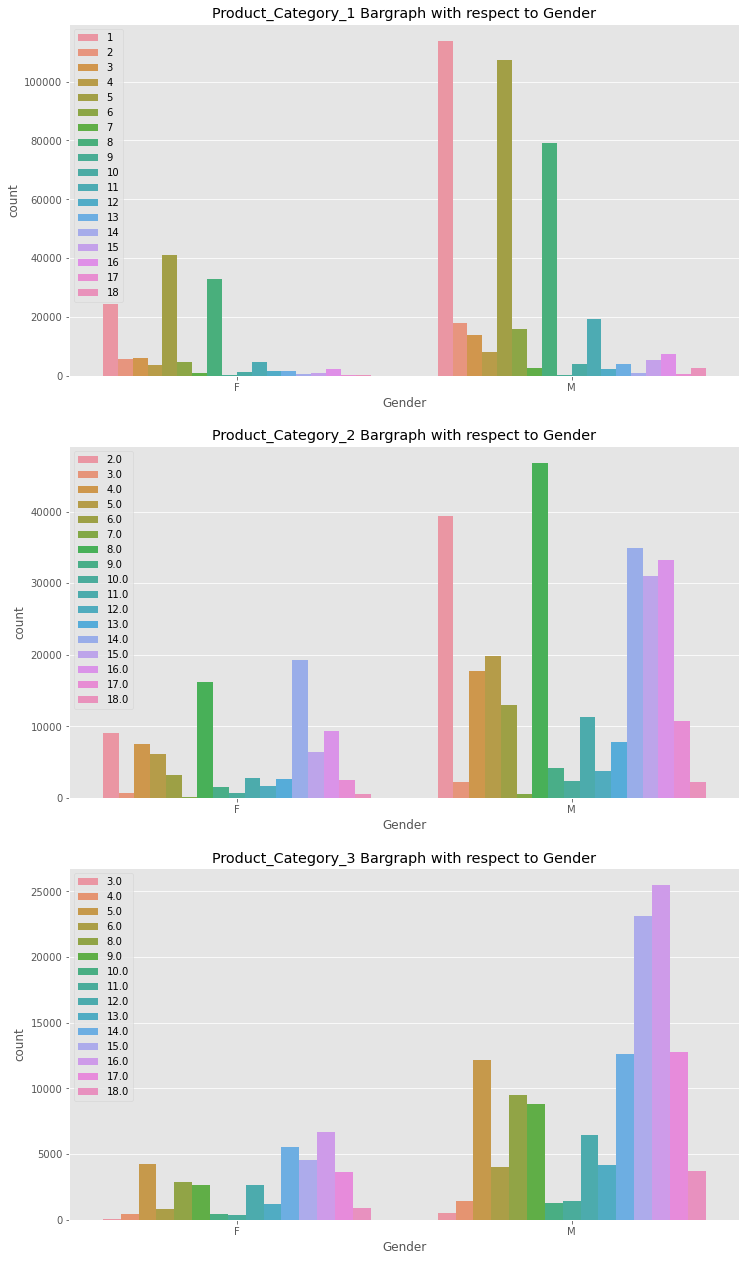

In [16]:
plt.figure(figsize=(12,22))

plt.subplot(311)
sns.countplot('Gender', hue = 'Product_Category_1', data = df)
plt.title('Product_Category_1 Bargraph with respect to Gender')
plt.legend(loc='upper left')

plt.subplot(312)
sns.countplot('Gender', hue = 'Product_Category_2', data = df)
plt.title('Product_Category_2 Bargraph with respect to Gender')
plt.legend(loc='upper left')

plt.subplot(313)
sns.countplot('Gender', hue = 'Product_Category_3', data = df)
plt.title('Product_Category_3 Bargraph with respect to Gender')
plt.legend(loc='upper left')
plt.show()

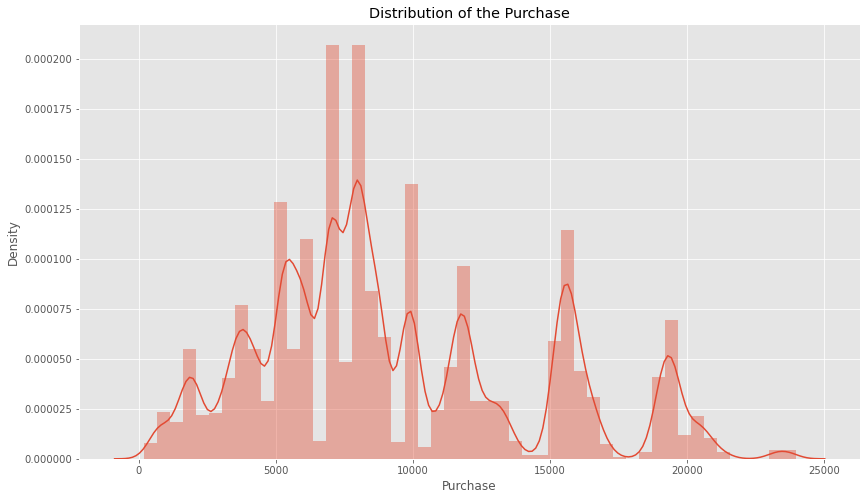

In [17]:
plt.figure(figsize=(14,8))

sns.distplot(df['Purchase'])
plt.title('Distribution of the Purchase')
plt.show()

# 4. 前处理

### 4-1） NULL 的处理

In [18]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

> null值由各产品类别中按年龄购买最多的商品代替

In [19]:
prod2 = dict(df.groupby('Age')['Product_Category_2'].agg(lambda x : x.value_counts().index[0]))
print(prod2)

prod3 = dict(df.groupby('Age')['Product_Category_3'].agg(lambda x : x.value_counts().index[0]))
print(prod3)

{'0-17': 4.0, '18-25': 8.0, '26-35': 8.0, '36-45': 8.0, '46-50': 8.0, '51-55': 8.0, '55+': 8.0}
{'0-17': 16.0, '18-25': 16.0, '26-35': 16.0, '36-45': 16.0, '46-50': 16.0, '51-55': 16.0, '55+': 16.0}


In [22]:
# 在category3产品中，所有年龄段的16号产品都是购买最多的产品，所以用16来填充null值。
df.Product_Category_3.fillna (value = 16.0, inplace = True)

# 填充category2的null值
for i in range(len(df)):
    if np.isnan(df.iloc[i, 9]) == True:
        age = df.iloc[i, 3]
        df.iloc[i, 9] = prod2[age]
        
df['Product_Category_2'] = df['Product_Category_2'].astype(int)
df['Product_Category_3'] = df['Product_Category_3'].astype(int)

print ("Null values present : ")
df.isna().sum(axis = 0)

Null values present : 


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

## 4-2） object 属性的处理

### - Product_ID -

In [30]:
df['Product_ID'].str.contains('P00').sum()

537577

> 全数据都包含‘P00’，所以乐意删除‘P00’，然后变成‘int’属性

In [40]:
# Changing the ProductID into numeric data
print ("The Product IDs containing the P00 : ", df.Product_ID.str.contains('P00').sum())

df.Product_ID = df['Product_ID'].str.replace("P00", "")
df['Product_ID'] = df.Product_ID.astype(int)

# Normalizing the User_ID
df.User_ID = df.User_ID - 1000000
df.User_ID

df.head()

The Product IDs containing the P00 :  537577


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,69042,F,0-17,10,A,2,0,3,4,16,8370
1,1,248942,F,0-17,10,A,2,0,1,6,14,15200
2,1,87842,F,0-17,10,A,2,0,12,4,16,1422
3,1,85442,F,0-17,10,A,2,0,12,14,16,1057
4,2,285442,M,55+,16,C,4+,0,8,8,16,7969


### - Age -

In [41]:
age = df['Age'].unique().tolist()
print (age)
dict_age = dict(zip(age, [17, 60, 35, 50, 55, 45, 25]))

print (dict_age)
df['Age'] = df['Age'].map(dict_age)

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
{'0-17': 17, '55+': 60, '26-35': 35, '46-50': 50, '51-55': 55, '36-45': 45, '18-25': 25}


In [42]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,69042,F,17,10,A,2,0,3,4,16,8370
1,1,248942,F,17,10,A,2,0,1,6,14,15200
2,1,87842,F,17,10,A,2,0,12,4,16,1422
3,1,85442,F,17,10,A,2,0,12,14,16,1057
4,2,285442,M,60,16,C,4+,0,8,8,16,7969


### - Stay_In_Current_City_Years -

In [45]:
stay = df['Stay_In_Current_City_Years'].unique().tolist()
print (stay)
dict_stay = dict(zip(stay, [2, 4, 3, 1, 0]))

print (dict_stay)
df['Stay_In_Current_City_Years'] = df.Stay_In_Current_City_Years.map(dict_stay)

['2', '4+', '3', '1', '0']
{'2': 2, '4+': 4, '3': 3, '1': 1, '0': 0}


### - City_Category / Gender-

In [ ]:
label_encoder_feat = {}
for feature in ['Gender', 'City_Category']:
    label_encoder_feat[feature] = preprocessing.LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

print(df.dtypes)

User_ID                       int64
Product_ID                    int32
Gender                        int32
Age                           int64
Occupation                    int64
City_Category                 int32
Stay_In_Current_City_Years    int64
Marital_Status                int64
Product_Category_1            int64
Product_Category_2            int32
Product_Category_3            int32
Purchase                      int64
dtype: object


## 4-3） 分配数据

In [53]:
Ytr = df['Purchase']
Xtr = df.drop(columns = ['Purchase'])

X_train, X_test, y_train, y_test = train_test_split(Xtr, Ytr, test_size = 0.2, random_state=0)

print ("The shape of the training data : ", X_train.shape)
print ("The shape of the testing data  : ", X_test.shape)

The shape of the training data :  (430061, 11)
The shape of the testing data  :  (107516, 11)


# 5. 机器学习 （Modeling)

## Linear Regression

In [54]:
# Training
lin_reg = LinearRegression(normalize = True).fit(X_train,y_train)

# Predictions
predictions = lin_reg.predict(X_test)

# Scores
print ("RMSE : ", math.sqrt(metrics.mean_squared_error(y_test, predictions)))
print ("MAE  : ", metrics.mean_absolute_error(y_test, predictions))

RMSE :  4676.421155190746
MAE  :  3587.420193830007


## Polynomial Regression

In [55]:
# Transforming data
poly = preprocessing.PolynomialFeatures(degree = 2)

X_poly = poly.fit_transform(Xtr)
X_poly, X_test_poly, y_poly, y_test_poly = train_test_split(X_poly, Ytr, test_size = 0.20, random_state=0)

pol_reg = LinearRegression().fit(X_poly,y_poly)

# Predictions
predictions = pol_reg.predict(X_test_poly)

# Scores
print ("RMSE : ", math.sqrt(metrics.mean_squared_error(y_test_poly, predictions)))
print ("MAE  : ", metrics.mean_absolute_error(y_test_poly, predictions))

RMSE :  4279.034520187861
MAE  :  3199.9152677704487


## Lasso Regression

In [56]:
# Training
linlasso = Lasso(alpha = 1,max_iter = 1000).fit(X_train, y_train)

# Predictions
predictions = linlasso.predict(X_test)

# Scores
print ("RMSE : ", math.sqrt(metrics.mean_squared_error(y_test, predictions)))
print ("MAE  : ", metrics.mean_absolute_error(y_test, predictions))

RMSE :  4676.419576131356
MAE  :  3587.3851017939373


## XGBoost

In [57]:
# Training
xgb_reg = xgb.XGBRegressor(objective ='reg:linear',
                           colsample_bytree = 0.3,
                           learning_rate = 0.05,
                           max_depth = 10,
                           alpha = 10,
                           n_estimators = 1000)

xgb_reg.fit(X_train, y_train)

# Predictions
predictions = xgb_reg.predict(X_test)

# Scores
print ("RMSE : ", math.sqrt(metrics.mean_squared_error(y_test, predictions)))
print ("MAE  : ", metrics.mean_absolute_error(y_test, predictions))

[18:26:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  2512.74962966896
MAE  :  1872.9265815177673


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

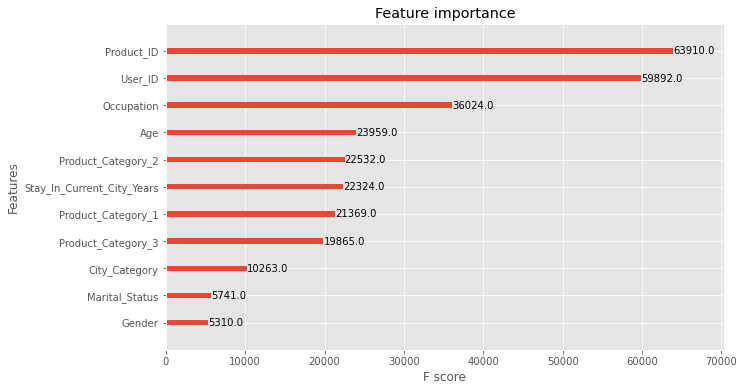

In [58]:
plot_importance(xgb_reg)

## ElasticNet

In [59]:
# Training
elastic_reg = ElasticNet(random_state=0)
elastic_reg.fit(X_train, y_train)

# Predictions
predictions = elastic_reg.predict(X_test)

# Scores
print ("RMSE : ", math.sqrt(metrics.mean_squared_error(y_test, predictions)))
print ("MAE  : ", metrics.mean_absolute_error(y_test, predictions))

RMSE :  4681.642239684884
MAE  :  3595.647978376869
